# Feature Extraction and Analysis for Dialog Act Recognition

In [1]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import os
import csv

## Feature Extraction



We have declared speaker-wise lists to store the concatenated intensity and pitch values as a first step for Z-score normalization.

In [2]:
cc_concat_pitch=[]
cl_concat_pitch=[]
gg_concat_pitch=[]
jg_concat_pitch=[]
mf_concat_pitch=[]
mk_concat_pitch=[]
mm_concat_pitch=[]
cc_concat_intensity=[]
cl_concat_intensity=[]
gg_concat_intensity=[]
jg_concat_intensity=[]
mf_concat_intensity=[]
mk_concat_intensity=[]
mm_concat_intensity=[]

Function to take the input wav file and speaker, and extract pitch and intensity from the left channel. The pitch and intensity is converted to an array, and preprocessed to remove null values and zeroes. The individual array for each wav file is appended to the appropriate list (declared above) according to the speaker.

In [3]:
def extractPitchIntensityAndConcat(file_path, speaker):
  sound = parselmouth.Sound(file_path)
  left_channel = sound.extract_left_channel()
  raw_pitch = parselmouth.praat.call(left_channel, "To Pitch (ac)", 0.0, 75, 15, False, 0.03, 0.45, 0.01, 0.35, 0.14, 600)
  
  pitch_array = raw_pitch.selected_array["frequency"]
  pitch_array = np.delete(pitch_array, np.where(pitch_array == 0))
  pitch_array = pitch_array[np.isfinite(pitch_array)]

  raw_intensity = call(left_channel, "To Intensity", 100, 0.0)

  intensity_array=raw_intensity.values
  intensity_array = np.delete(intensity_array, np.where(intensity_array == 0))
  intensity_array = intensity_array[np.isfinite(intensity_array)]

  
  if speaker=="cc":
    cc_concat_pitch.append(pitch_array)
    cc_concat_intensity.append(intensity_array)
  elif speaker=="cl":
    cl_concat_pitch.append(pitch_array)
    cl_concat_intensity.append(intensity_array)
  elif speaker=="gg":
    gg_concat_pitch.append(pitch_array)
    gg_concat_intensity.append(intensity_array)
  elif speaker=="jg":
    jg_concat_pitch.append(pitch_array)
    jg_concat_intensity.append(intensity_array)
  elif speaker=="mf":
    mf_concat_pitch.append(pitch_array)
    mf_concat_intensity.append(intensity_array)
  elif speaker=="mk":
    mk_concat_pitch.append(pitch_array)
    mk_concat_intensity.append(intensity_array)
  else:
    mm_concat_pitch.append(pitch_array)
    mm_concat_intensity.append(intensity_array)

Call to function 'extractPitchIntensityAndConcat' by passing the file path and speaker as arguments. 

In [4]:
speech_folder_path="./hw3_speech_files"
for file_name in os.listdir(speech_folder_path):
  if file_name.endswith(".wav"):
        file_path = os.path.join(speech_folder_path, file_name)
        speaker = os.path.basename(file_path)[:2]
        extractPitchIntensityAndConcat(file_path,speaker)

I calculated the overall speaker-wise mean and standard deviation for each concatenated speaker-wise intensity list to perform Z-score normalization in the subsequent function.

In [5]:
cc_concat_intensity=np.concatenate((cc_concat_intensity))
cc_mean_intensity=np.mean(cc_concat_intensity)
cc_std_intensity=np.std(cc_concat_intensity)

cl_concat_intensity=np.concatenate((cl_concat_intensity))
cl_mean_intensity=np.mean(cl_concat_intensity)
cl_std_intensity=np.std(cl_concat_intensity)

gg_concat_intensity=np.concatenate((gg_concat_intensity))
gg_mean_intensity=np.mean(gg_concat_intensity)
gg_std_intensity=np.std(gg_concat_intensity)

jg_concat_intensity=np.concatenate((jg_concat_intensity))
jg_mean_intensity=np.mean(jg_concat_intensity)
jg_std_intensity=np.std(jg_concat_intensity)

mf_concat_intensity=np.concatenate((mf_concat_intensity))
mf_mean_intensity=np.mean(mf_concat_intensity)
mf_std_intensity=np.std(mf_concat_intensity)

mk_concat_intensity=np.concatenate((mk_concat_intensity))
mk_mean_intensity=np.mean(mk_concat_intensity)
mk_std_intensity=np.std(mk_concat_intensity)

mm_concat_intensity=np.concatenate((mm_concat_intensity))
mm_mean_intensity=np.mean(mm_concat_intensity)
mm_std_intensity=np.std(mm_concat_intensity)

I calculated the overall speaker-wise mean and standard deviation for each concatenated speaker-wise pitch list to perform Z-score normalization in the subsequent function.

In [6]:
cc_concat_pitch = np.concatenate(cc_concat_pitch).ravel()
cc_mean_pitch=np.mean(cc_concat_pitch)
cc_std_pitch=np.std(cc_concat_pitch)

cl_concat_pitch = np.concatenate(cl_concat_pitch).ravel()
cl_mean_pitch=np.mean(cl_concat_pitch)
cl_std_pitch=np.std(cl_concat_pitch)

gg_concat_pitch = np.concatenate(gg_concat_pitch).ravel()
gg_mean_pitch=np.mean(gg_concat_pitch)
gg_std_pitch=np.std(gg_concat_pitch)

jg_concat_pitch = np.concatenate(jg_concat_pitch).ravel()
jg_mean_pitch=np.mean(jg_concat_pitch)
jg_std_pitch=np.std(jg_concat_pitch)

mf_concat_pitch = np.concatenate(mf_concat_pitch).ravel()
mf_mean_pitch=np.mean(mf_concat_pitch)
mf_std_pitch=np.std(mf_concat_pitch)

mk_concat_pitch = np.concatenate(mk_concat_pitch).ravel()
mk_mean_pitch=np.mean(mk_concat_pitch)
mk_std_pitch=np.std(mk_concat_pitch)

mm_concat_pitch = np.concatenate(mm_concat_pitch).ravel()
mm_mean_pitch=np.mean(mm_concat_pitch)
mm_std_pitch=np.std(mm_concat_pitch)

Declare a pandas dataframe with columns for the file name, speaker, emotion, and the normalized and raw values for the min, max, and mean of pitch and intensity.

In [7]:
df = pd.DataFrame(columns=['FileName', 'Speaker','Emotion', 'NormMinPitch', 'NormMaxPitch', 'NormMeanPitch','NormMinIntensity','NormMaxIntensity','NormMeanIntensity','RawMinPitch','RawMaxPitch','RawMeanPitch','RawMinIntensity','RawMaxIntensity','RawMeanIntensity'])

Create a list of emotions to cross-check against the input argument in the function and store in the dataframe.

In [8]:
emotions=['anxiety', 'boredom', 'cold-anger', 'contempt', 'despair', 'disgust', 'elation', 'happy', 'hot-anger', 'interest', 'neutral', 'panic', 'pride', 'sadness', 'shame']


Function for normalizing the pitch and intensity, and writing all the features of each data point in the dataframe. For the feature analysis part, the raw (without normalization) values for min, max, and mean of pitch and intensity are taken. For Z-score normalization, each element of the input array is subtracted by the overall mean for that speaker, and divided by the overall standard deviation for that speaker.

In [9]:
def normalizePitchIntensityAndWrite(file_path,speaker, file_name, emotion):
    emotion_to_insert=""
    sound = parselmouth.Sound(file_path)
    left_channel = sound.extract_left_channel()
    raw_pitch = parselmouth.praat.call(left_channel, "To Pitch (ac)", 0.0, 75, 15, False, 0.03, 0.45, 0.01, 0.35, 0.14, 600)
    
    raw_pitch_min = call(raw_pitch, "Get minimum", 0.0, 0.0, "Hertz", "Parabolic")
    raw_pitch_max = call(raw_pitch, "Get maximum", 0.0, 0.0, "Hertz", "Parabolic")
    raw_pitch_mean = call(raw_pitch, "Get mean", 0.0, 0.0, "Hertz")

    pitch_array = raw_pitch.selected_array["frequency"]
    pitch_array = np.delete(pitch_array, np.where(pitch_array == 0))
    pitch_array = pitch_array[np.isfinite(pitch_array)] 
    

    raw_intensity = call(left_channel, "To Intensity", 100, 0.0)
    
    raw_intensity_min = call(raw_intensity, "Get minimum", 0.0, 0.0, "Parabolic")
    raw_intensity_max = call(raw_intensity, "Get maximum", 0.0, 0.0, "Parabolic")
    raw_intensity_mean = call(raw_intensity, "Get mean", 0.0, 0.0, "energy")

    intensity_array=raw_intensity.values
    intensity_array = np.delete(intensity_array, np.where(intensity_array == 0))
    intensity_array = intensity_array[np.isfinite(intensity_array)]
    

    for e in emotions:
      if e in emotion:
        emotion_to_insert=e
        
    if speaker=="cc":
      pitch_array=(pitch_array-cc_mean_pitch)/cc_std_pitch
      intensity_array=(intensity_array-cc_mean_intensity)/cc_std_intensity

    elif speaker=="cl":
      pitch_array=(pitch_array-cl_mean_pitch)/cl_std_pitch
      intensity_array=(intensity_array-cl_mean_intensity)/cl_std_intensity

    elif speaker=="gg":
      pitch_array=(pitch_array-gg_mean_pitch)/gg_std_pitch
      intensity_array=(intensity_array-gg_mean_intensity)/gg_std_intensity

    elif speaker=="jg":
      pitch_array=(pitch_array-jg_mean_pitch)/jg_std_pitch
      intensity_array=(intensity_array-jg_mean_intensity)/jg_std_intensity

    elif speaker=="mf":
      pitch_array=(pitch_array-mf_mean_pitch)/mf_std_pitch
      intensity_array=(intensity_array-mf_mean_intensity)/mf_std_intensity

    elif speaker=="mk":
      pitch_array=(pitch_array-mk_mean_pitch)/mk_std_pitch
      intensity_array=(intensity_array-mk_mean_intensity)/mk_std_intensity

    else:
      pitch_array=(pitch_array-mm_mean_pitch)/mm_std_pitch
      intensity_array=(intensity_array-mm_mean_intensity)/mm_std_intensity

    min_pitch=np.min(pitch_array)
    max_pitch=np.max(pitch_array)
    mean_pitch=np.mean(pitch_array)

    min_intensity=np.min(intensity_array)
    max_intensity=np.max(intensity_array)
    mean_intensity=np.mean(intensity_array)

    list_row = [file_name, speaker, emotion_to_insert, min_pitch, max_pitch, mean_pitch, min_intensity, max_intensity, mean_intensity, raw_pitch_min,raw_pitch_max, raw_pitch_mean, raw_intensity_min, raw_intensity_max, raw_intensity_mean]
    df.loc[len(df)] = list_row


Call to the function 'normalizePitchIntensityAndWrite' by passing the file path, speaker name, file name, and the emotion.

In [10]:
for file_name in os.listdir(speech_folder_path):
  if file_name.endswith(".wav"):
        file_path = os.path.join(speech_folder_path, file_name)
        speaker = os.path.basename(file_path)[:2]
        emotion=os.path.basename(file_path)[7:17]
        normalizePitchIntensityAndWrite(file_path,speaker, file_name, emotion)

We can see that the dataframe created contains all the features required for extraction and further analysis through error bars.

In [11]:
df.head()

,FileName,Speaker,Emotion,NormMinPitch,NormMaxPitch,NormMeanPitch,NormMinIntensity,NormMaxIntensity,NormMeanIntensity,RawMinPitch,RawMaxPitch,RawMeanPitch,RawMinIntensity,RawMaxIntensity,RawMeanIntensity
0,cc_001_anxiety_910.77_May-twenty-third.wav,cc,anxiety,-1.110062,-0.481694,-0.826991,-0.727257,1.597329,0.811954,76.851940,134.307193,102.734783,43.873178,80.454458,73.120570
1,cc_001_anxiety_916.11_Eight-hundred-eight.wav,cc,anxiety,-0.984226,3.198921,-0.401814,-1.274009,1.734765,0.800818,88.357876,470.846252,141.611079,35.269165,82.631094,74.050812
2,cc_001_anxiety_918.66_Eight-hundred-eight.wav,cc,anxiety,-1.100491,2.935553,-0.445653,-0.979902,1.664985,0.812310,77.727072,446.765057,137.602579,39.897412,81.598756,74.792434
3,cc_001_anxiety_928.48_Four-thousand-eight.wav,cc,anxiety,-0.932113,3.878519,-0.201252,-0.643487,1.947296,0.998077,93.122852,534.548642,159.949508,45.191436,85.992701,78.139898
4,cc_001_anxiety_934.73_Nine-thousand-six.wav,cc,anxiety,-1.058847,-0.236017,-0.782388,-0.764037,1.429663,0.730360,81.534891,156.770768,106.813002,43.087483,77.891872,72.475204


## Feature Analysis

Create separate dataframes for each feature (both normalized and raw versions) we want to plot. This is done by using the groupby function to group the data by emotion, and then using the agg function to store the corresponding mean and standard deviation values. Lastly, we use reset_index() to store the emotion as a column in the dataframe instead of an index.

In [12]:
df1=df.drop(columns=['FileName','Speaker'])
df_norm_min_pitch=df1.groupby("Emotion").agg([np.mean, np.std])["NormMinPitch"].reset_index()
df_norm_max_pitch=df1.groupby("Emotion").agg([np.mean, np.std])["NormMaxPitch"].reset_index()
df_norm_mean_pitch=df1.groupby("Emotion").agg([np.mean, np.std])["NormMeanPitch"].reset_index()
df_norm_min_intensity=df1.groupby("Emotion").agg([np.mean, np.std])["NormMinIntensity"].reset_index()
df_norm_max_intensity=df1.groupby("Emotion").agg([np.mean, np.std])["NormMaxIntensity"].reset_index()
df_norm_mean_intensity=df1.groupby("Emotion").agg([np.mean, np.std])["NormMeanIntensity"].reset_index()

In [13]:
df_raw_pitch_min=df1.groupby("Emotion").agg([np.mean, np.std])["RawMinPitch"].reset_index()
df_raw_pitch_max=df1.groupby("Emotion").agg([np.mean, np.std])["RawMaxPitch"].reset_index()
df_raw_pitch_mean=df1.groupby("Emotion").agg([np.mean, np.std])["RawMeanPitch"].reset_index()
df_raw_intensity_min=df1.groupby("Emotion").agg([np.mean, np.std])["RawMinIntensity"].reset_index()
df_raw_intensity_max=df1.groupby("Emotion").agg([np.mean, np.std])["RawMaxIntensity"].reset_index()
df_raw_intensity_mean=df1.groupby("Emotion").agg([np.mean, np.std])["RawMeanIntensity"].reset_index()

Defining the function for plotting the graph. This graph plots the mean and the standard deviation in the form of an error bar.

In [14]:
def graph(df):
  plt.errorbar(df['Emotion'], df['mean'], yerr=df['std'], fmt='o', color='Black', elinewidth=3,capthick=3,errorevery=1, alpha=1, ms=4, capsize = 5)
  plt.bar(df['Emotion'], df['mean'],tick_label = df['Emotion'])
  plt.xticks(rotation =90)
  plt.xlabel('Emotions')
  plt.ylabel('Average of Feature')

### Plot of Normalized min pitch 

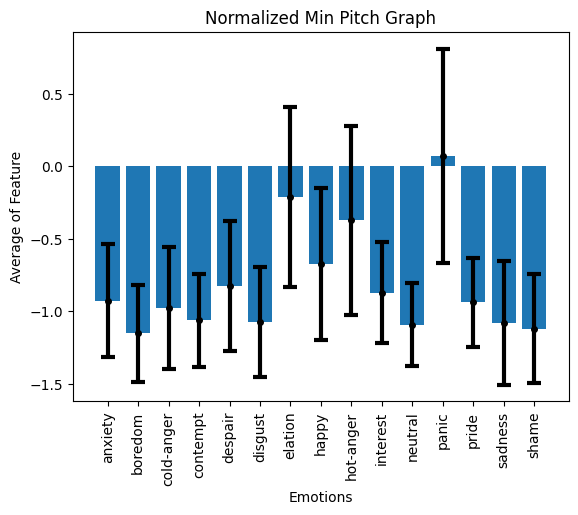

In [15]:
plt.title('Normalized Min Pitch Graph') 
graph(df_norm_min_pitch)

### Plot of Normalized max pitch

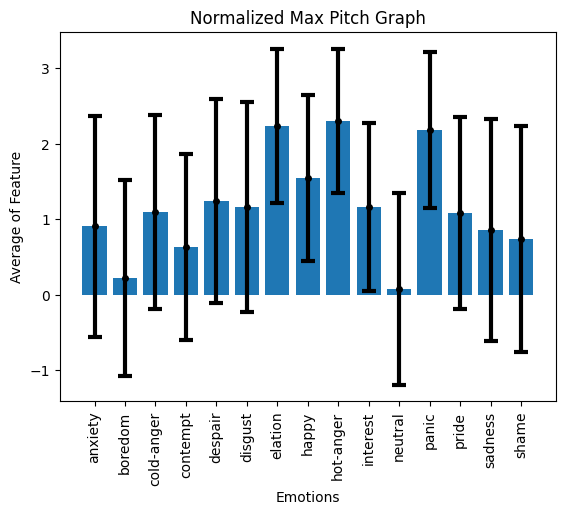

In [16]:
plt.title("Normalized Max Pitch Graph")
graph(df_norm_max_pitch)

### Plot of Normalized mean pitch 

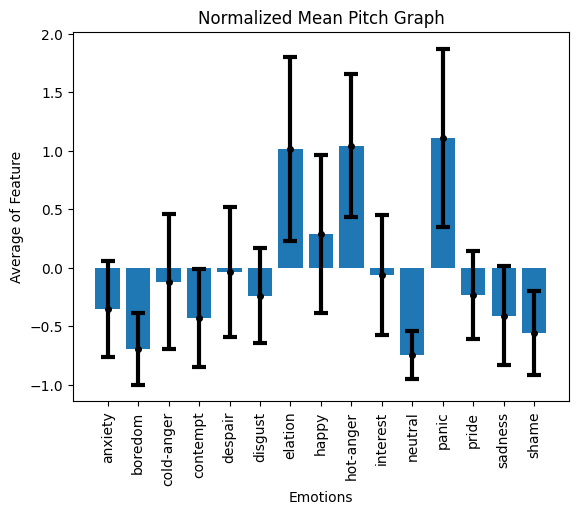

In [17]:
plt.title("Normalized Mean Pitch Graph")
graph(df_norm_mean_pitch)

### Plot of Normalized min intensity 

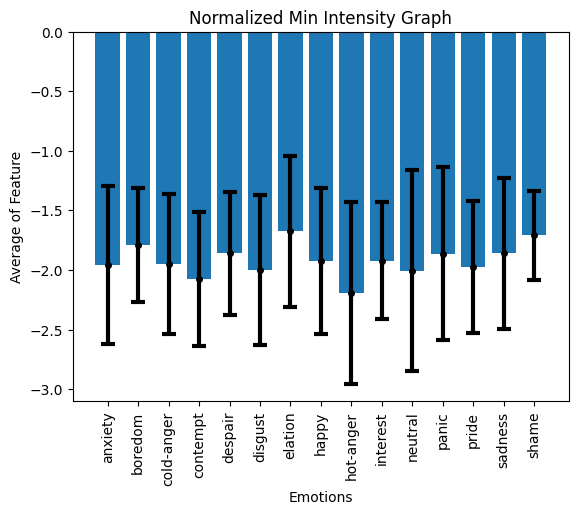

In [18]:
plt.title("Normalized Min Intensity Graph")
graph(df_norm_min_intensity)

### Plot of Normalized max intensity 

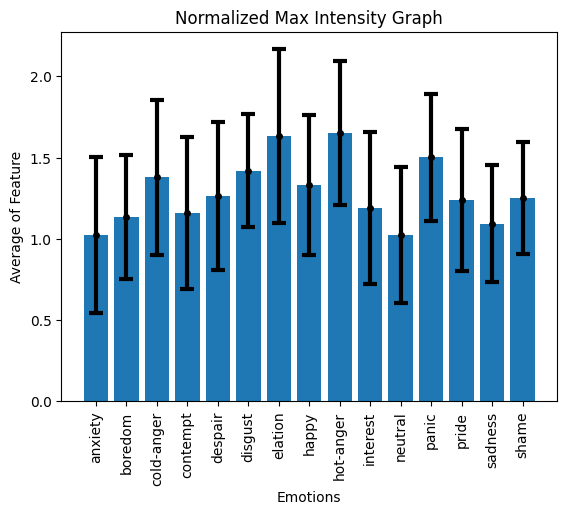

In [19]:
plt.title("Normalized Max Intensity Graph")
graph(df_norm_max_intensity)

### Plot of Normalized mean intensity 

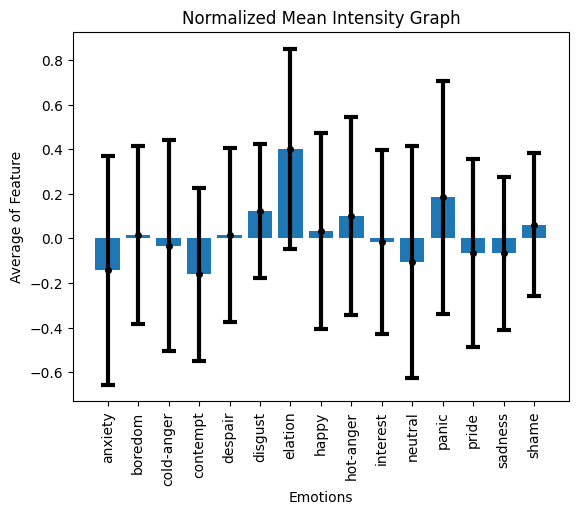

In [20]:
plt.title("Normalized Mean Intensity Graph")
graph(df_norm_mean_intensity)

### Plot of Raw min pitch 

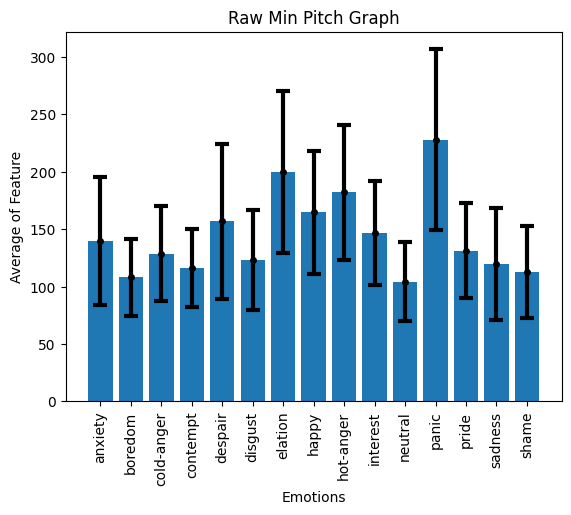

In [21]:
plt.title("Raw Min Pitch Graph")
graph(df_raw_pitch_min)

### Plot of Raw max pitch 

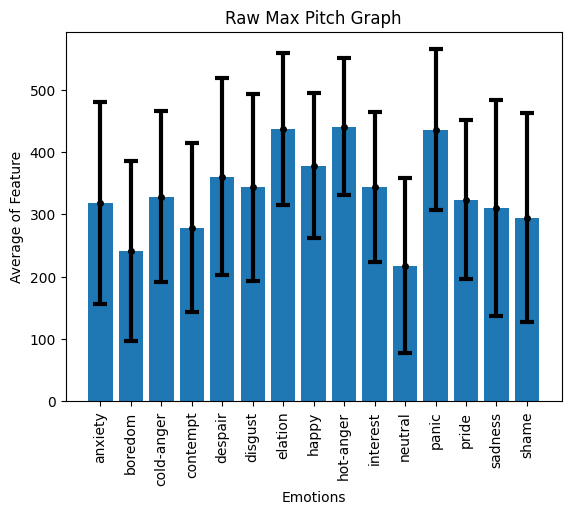

In [22]:
plt.title("Raw Max Pitch Graph")
graph(df_raw_pitch_max)

### Plot of Raw mean pitch 

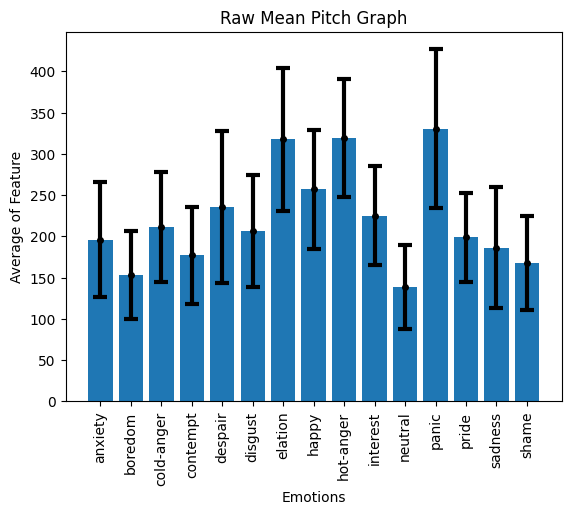

In [23]:
plt.title("Raw Mean Pitch Graph")
graph(df_raw_pitch_mean)

### Plot of Raw min intensity 

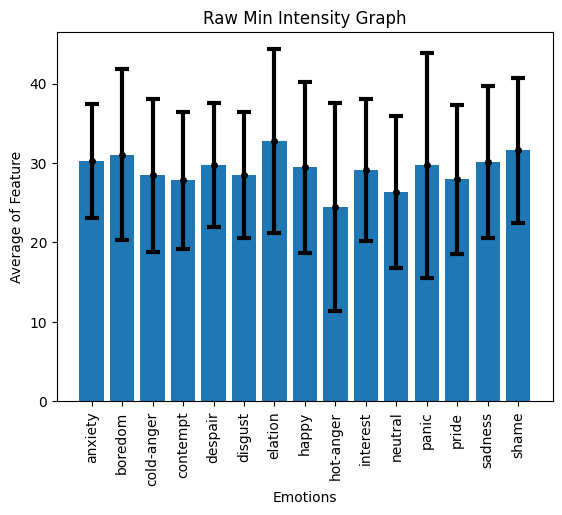

In [24]:
plt.title("Raw Min Intensity Graph")
graph(df_raw_intensity_min)

### Plot of Raw max intensity 

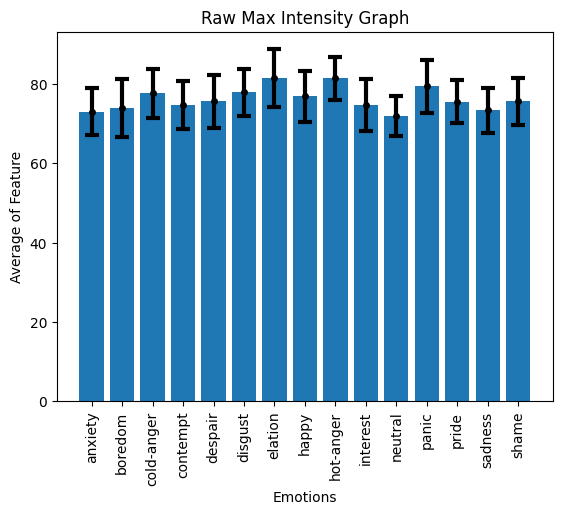

In [25]:
plt.title("Raw Max Intensity Graph")
graph(df_raw_intensity_max)

### Plot of Raw mean intensity 

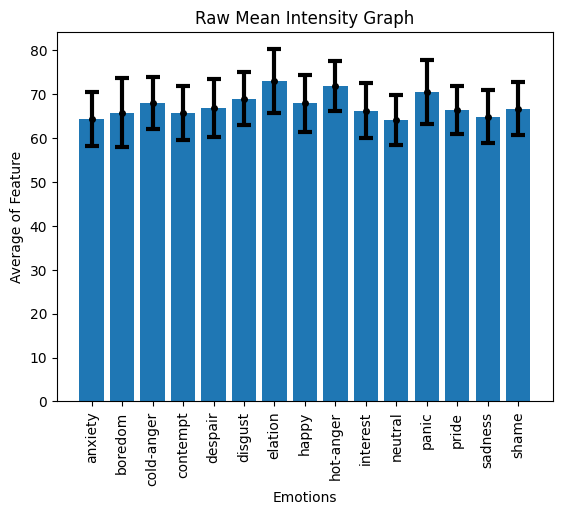

In [26]:
plt.title("Raw Mean Intensity Graph")
graph(df_raw_intensity_mean)